In [169]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


import warnings
warnings.filterwarnings('ignore')

In [98]:
train= pd.read_csv("C:\\Users\\Bharath\\Downloads\\Training_Data_Set.csv")


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

* As we can see there is 3 columns of type float, 5 columns of type int, 9 columns is of type string.

In [100]:
train.isna().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

* We have some null values in our data 
* let's try to treat them.

In [101]:

px.box(x=['Distance '], data_frame= train)




In [102]:
px.box(x='engine_power', data_frame= train)

* Since there is outliers in both 'Distance' and 'engine_power'.
* We will impute the null values by Median.
* In the body_type column 92% of the values are null. if we try to impute them the model will be biased.
    * So we'll drop that particular column.

In [103]:
train['Distance '].fillna(train['Distance '].median(),inplace=True)
train['engine_power'].fillna(train['engine_power'].median(),inplace=True)

train.drop('body_type',axis=1,inplace=True)



In [104]:
train1= train.copy()

In [105]:
train1.isna().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

# Since there is outlier's . let's treat them accordingly 

In [106]:
Q1= train1.quantile(0.25)
Q3= train1.quantile(0.75)
IQR= Q3-Q1
IQR

Id                      26757.000
Distance               116797.000
manufacture_year            6.000
Age of car                  6.000
engine_displacement       600.000
engine_power               51.000
Vroom Audit Rating          2.000
Price                  972647.625
dtype: float64

In [107]:
train1 = train1.select_dtypes(include=['int', 'float'])


In [108]:
train1

Id  Distance   manufacture_year  Age of car  engine_displacement  \
0      25001    65520.0              1964          55                 1964   
1      25002    27750.0              2012           7                 1242   
2      25003    46000.0              2014           5                 1995   
3      25004    43949.0              2011           8                 1618   
4      25005    59524.0              2012           7                 2993   
...      ...        ...               ...         ...                  ...   
53510  78511    29334.0              2014           5                 1598   
53511  78512   223631.0              2009          10                 1900   
53512  78513    25500.0              2015           4                 1995   
53513  78514  1195500.0              2011           8                11950   
53514  78515   142000.0              2008          11                 2993   

       engine_power  Vroom Audit Rating       Price  
0             147.0                   8   543764.25  
1              51.0                   6   401819.25  
2             105.0                   7  2392855.50  
3             140.0                   7   958606.50  
4             180.0                   7  3085561.50  
...             ...                 ...         ...  
53510          77.0                   4  1342996.50  
53511          77.0                   8   510732.75  
53512         105.0                   4  2008123.50  
53513          93.0                   5   874352.25  
53514         173.0                   4  1576610.25  

[53515 rows x 8 columns]

In [109]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(train1 < Q1 - 1.5 * IQR)[0], np.where(train1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    train1.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(train1 > Q3 + 1.5 * IQR)[0], np.where(train1 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    train1.iloc[i,j] = whisker[j]

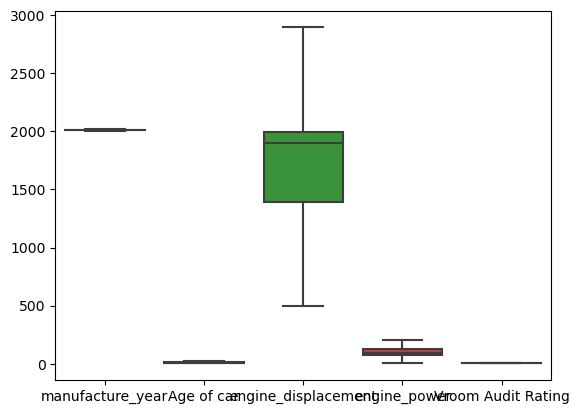

In [110]:
sns.boxplot(data=train1.drop(['Price','Distance ','Id'],axis=1))
plt.show()

# After imputing the outlier's .We can observe there is no outlier's in numeric columns


In [111]:
train2 = train.select_dtypes(include='object')
train2

Maker    model   Location      Owner Type transmission door_count  \
0       skoda  octavia  Ahmedabad          Second          man       None   
1        fiat    panda  Ahmedabad           Third          man          4   
2         bmw       x1  Hyderabad           Third         auto          4   
3      nissan     juke     Mumbai           Third          man          4   
4         bmw       x5     Jaipur  Fourth & Above         auto          4   
...       ...      ...        ...             ...          ...        ...   
53510   skoda  octavia      Delhi  Fourth & Above          man          4   
53511   skoda  octavia  Bangalore  Fourth & Above          man          5   
53512     bmw       x1       Pune           Third         auto          4   
53513  toyota  avensis     Jaipur           Third          man       None   
53514     bmw       x5      Kochi           First         auto          5   

      seat_count fuel_type  
0           None    petrol  
1              4    petrol  
2              5    diesel  
3              5    petrol  
4              5    diesel  
...          ...       ...  
53510          5    diesel  
53511          5    diesel  
53512          5    diesel  
53513       None    diesel  
53514          5    diesel  

[53515 rows x 8 columns]

In [113]:
# concatenating the cleaned numeric dataframe with the leftout categorical columns
dfr= pd.concat([train2,train1], axis=1)
dfr

Maker    model   Location      Owner Type transmission door_count  \
0       skoda  octavia  Ahmedabad          Second          man       None   
1        fiat    panda  Ahmedabad           Third          man          4   
2         bmw       x1  Hyderabad           Third         auto          4   
3      nissan     juke     Mumbai           Third          man          4   
4         bmw       x5     Jaipur  Fourth & Above         auto          4   
...       ...      ...        ...             ...          ...        ...   
53510   skoda  octavia      Delhi  Fourth & Above          man          4   
53511   skoda  octavia  Bangalore  Fourth & Above          man          5   
53512     bmw       x1       Pune           Third         auto          4   
53513  toyota  avensis     Jaipur           Third          man       None   
53514     bmw       x5      Kochi           First         auto          5   

      seat_count fuel_type     Id  Distance   manufacture_year  Age of car  \
0           None    petrol  25001    65520.0              1999          20   
1              4    petrol  25002    27750.0              2012           7   
2              5    diesel  25003    46000.0              2014           5   
3              5    petrol  25004    43949.0              2011           8   
4              5    diesel  25005    59524.0              2012           7   
...          ...       ...    ...        ...               ...         ...   
53510          5    diesel  78511    29334.0              2014           5   
53511          5    diesel  78512   223631.0              2009          10   
53512          5    diesel  78513    25500.0              2015           4   
53513       None    diesel  78514   308499.5              2011           8   
53514          5    diesel  78515   142000.0              2008          11   

       engine_displacement  engine_power  Vroom Audit Rating         Price  
0                     1964         147.0                   8  5.437642e+05  
1                     1242          51.0                   6  4.018192e+05  
2                     1995         105.0                   7  2.392856e+06  
3                     1618         140.0                   7  9.586065e+05  
4                     2895         180.0                   7  2.936800e+06  
...                    ...           ...                 ...           ...  
53510                 1598          77.0                   4  1.342996e+06  
53511                 1900          77.0                   8  5.107328e+05  
53512                 1995         105.0                   4  2.008124e+06  
53513                 2895          93.0                   5  8.743522e+05  
53514                 2895         173.0                   4  1.576610e+06  

[53515 rows x 16 columns]

In [115]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  object 
 1   model                53515 non-null  object 
 2   Location             53515 non-null  object 
 3   Owner Type           53515 non-null  object 
 4   transmission         53515 non-null  object 
 5   door_count           53515 non-null  object 
 6   seat_count           53515 non-null  object 
 7   fuel_type            53515 non-null  object 
 8   Id                   53515 non-null  int64  
 9   Distance             53515 non-null  float64
 10  manufacture_year     53515 non-null  int64  
 11  Age of car           53515 non-null  int64  
 12  engine_displacement  53515 non-null  int64  
 13  engine_power         53515 non-null  float64
 14  Vroom Audit Rating   53515 non-null  int64  
 15  Price                53515 non-null 

* There is 'None' value present in the 'door_count' and 'seat_count'column
* Let's Drop the rows which have 'None' as their door_count or seat_count.

In [151]:
dfr.drop(dfr[dfr['seat_count']=='None'].index,inplace=True)
dfr.drop(dfr[dfr['door_count'] == 'None'].index, inplace=True)
dfr.door_count.unique()

array(['4', '5', '2', '3', '6'], dtype=object)

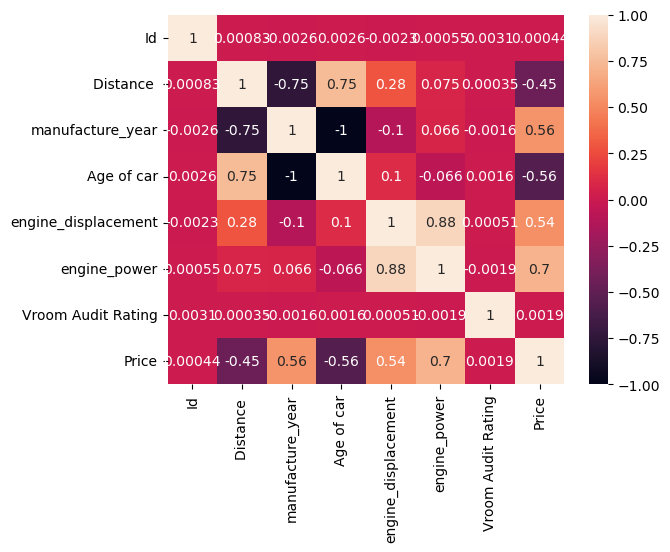

<Figure size 2000x2000 with 0 Axes>

In [152]:
sns.heatmap(dfr.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [153]:
df1=dfr.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43007 entries, 1 to 53514
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                43007 non-null  object 
 1   model                43007 non-null  object 
 2   Location             43007 non-null  object 
 3   Owner Type           43007 non-null  object 
 4   transmission         43007 non-null  object 
 5   door_count           43007 non-null  object 
 6   seat_count           43007 non-null  object 
 7   fuel_type            43007 non-null  object 
 8   Id                   43007 non-null  int64  
 9   Distance             43007 non-null  float64
 10  manufacture_year     43007 non-null  int64  
 11  Age of car           43007 non-null  int64  
 12  engine_displacement  43007 non-null  int64  
 13  engine_power         43007 non-null  float64
 14  Vroom Audit Rating   43007 non-null  int64  
 15  Price                43007 non-null 

array(['4', '5', '2', '3', '1', '6'], dtype=object)

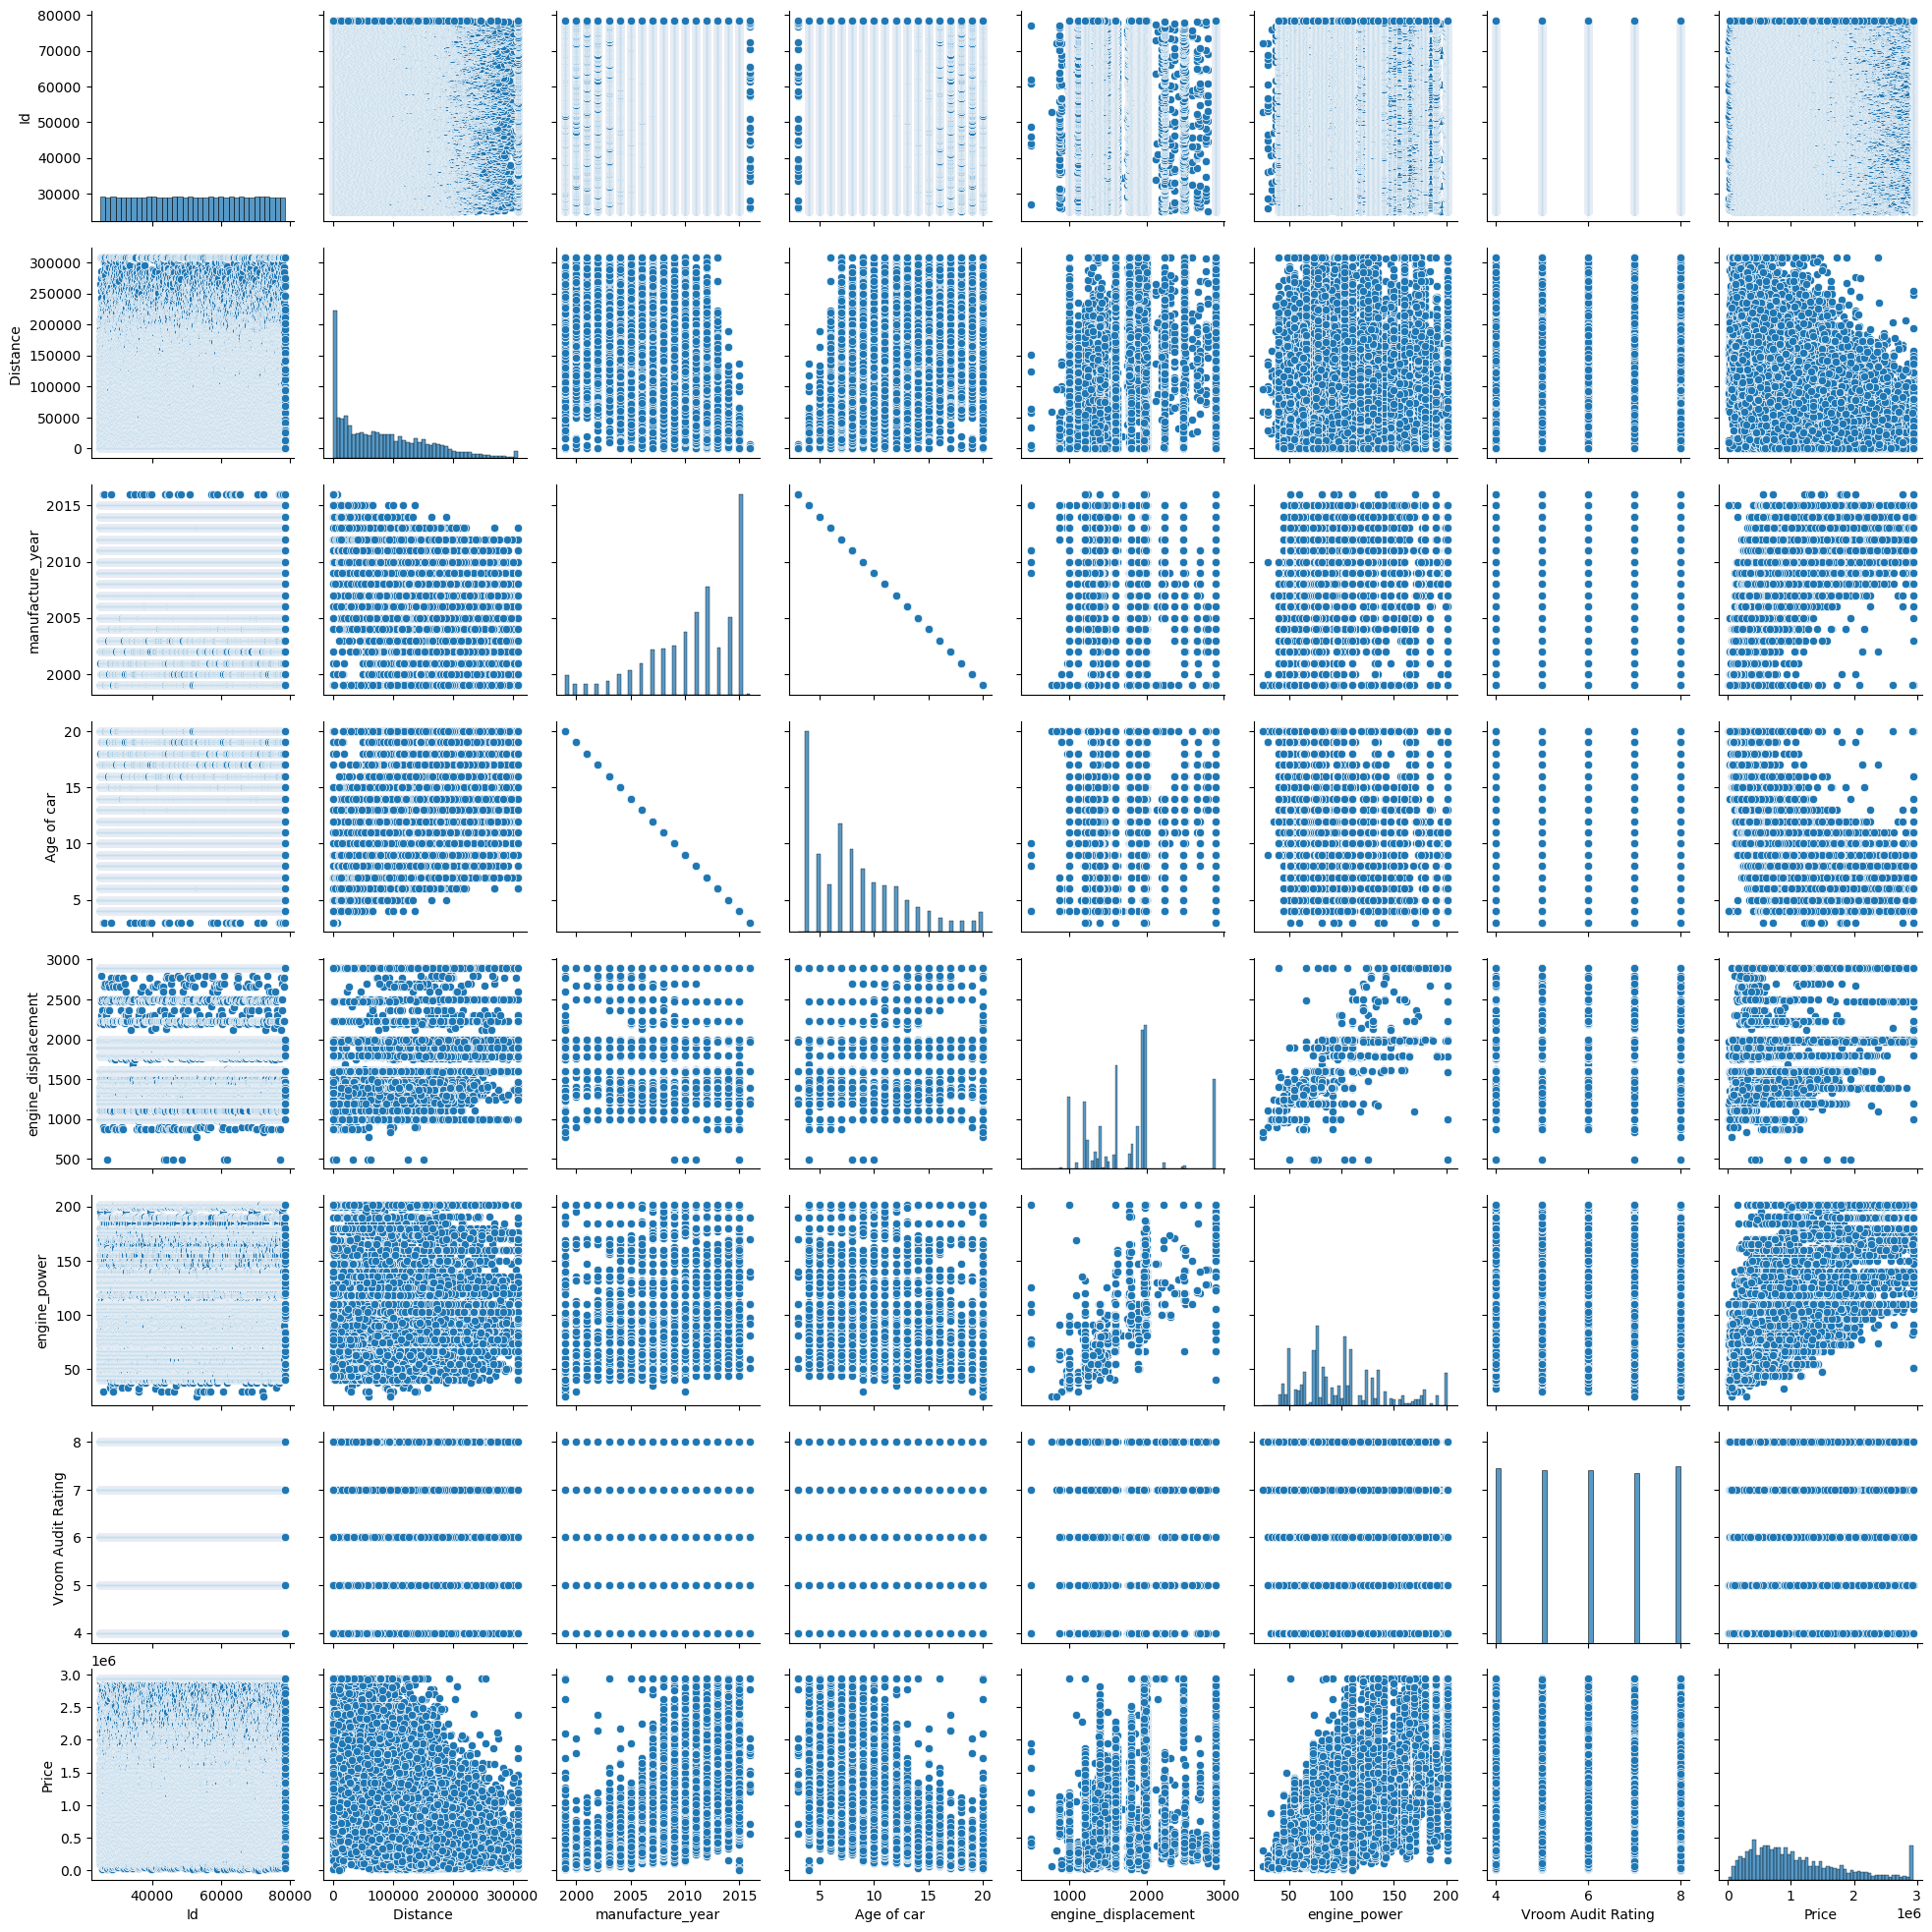

In [155]:
sns.pairplot(df1)


In [154]:
mms = MinMaxScaler()
mms

MinMaxScaler()

* Before scaling let's not include the target variable 
* manufacute_year is positively co-related with age so let,s drop that to avoid multi-colinearity
* 'Id' and "vroom audit rating" have no co-relation with the target variable so let,s drop these two columns

In [309]:

df2=df1.drop(['Price','manufacture_year','Id','seat_count','Vroom Audit Rating'],axis=1)
df2

Maker    model   Location      Owner Type transmission door_count  \
1        fiat    panda  Ahmedabad           Third          man          4   
2         bmw       x1  Hyderabad           Third         auto          4   
3      nissan     juke     Mumbai           Third          man          4   
4         bmw       x5     Jaipur  Fourth & Above         auto          4   
5       skoda  octavia    Chennai           First          man          4   
...       ...      ...        ...             ...          ...        ...   
53508   skoda  octavia    Chennai  Fourth & Above          man          5   
53510   skoda  octavia      Delhi  Fourth & Above          man          4   
53511   skoda  octavia  Bangalore  Fourth & Above          man          5   
53512     bmw       x1       Pune           Third         auto          4   
53514     bmw       x5      Kochi           First         auto          5   

      fuel_type  Distance   Age of car  engine_displacement  engine_power  
1        petrol    27750.0           7                 1242          51.0  
2        diesel    46000.0           5                 1995         105.0  
3        petrol    43949.0           8                 1618         140.0  
4        diesel    59524.0           7                 2895         180.0  
5        diesel    12015.0           4                 1968         110.0  
...         ...        ...         ...                  ...           ...  
53508    diesel   262740.0          12                 2000         103.0  
53510    diesel    29334.0           5                 1598          77.0  
53511    diesel   223631.0          10                 1900          77.0  
53512    diesel    25500.0           4                 1995         105.0  
53514    diesel   142000.0          11                 2895         173.0  

[43007 rows x 11 columns]

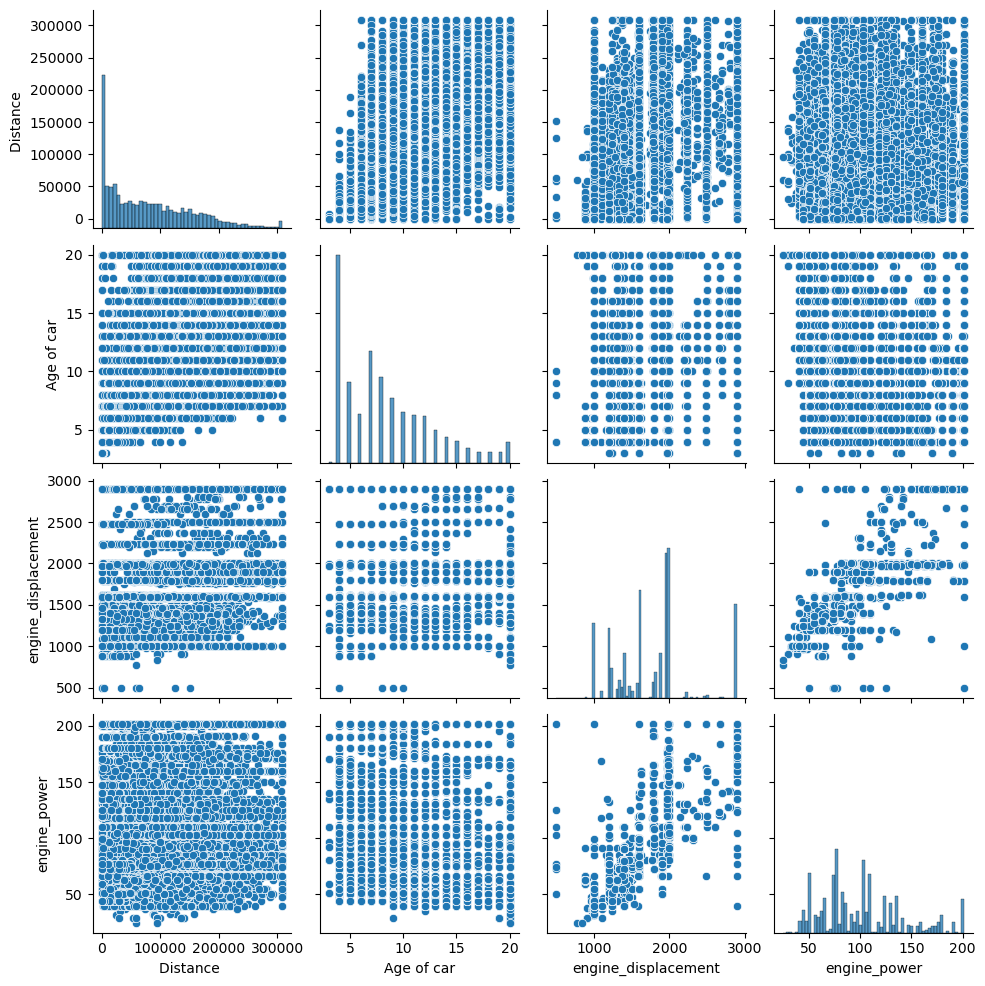

In [310]:
sns.pairplot(df2)
plt.show()

In [311]:
#scaling the numeric columns
for i in df2.select_dtypes(include=['int', 'float']):
    df2[i] = mms.fit_transform(df2[[i]])

In [312]:
df2

Maker    model   Location      Owner Type transmission door_count  \
1        fiat    panda  Ahmedabad           Third          man          4   
2         bmw       x1  Hyderabad           Third         auto          4   
3      nissan     juke     Mumbai           Third          man          4   
4         bmw       x5     Jaipur  Fourth & Above         auto          4   
5       skoda  octavia    Chennai           First          man          4   
...       ...      ...        ...             ...          ...        ...   
53508   skoda  octavia    Chennai  Fourth & Above          man          5   
53510   skoda  octavia      Delhi  Fourth & Above          man          4   
53511   skoda  octavia  Bangalore  Fourth & Above          man          5   
53512     bmw       x1       Pune           Third         auto          4   
53514     bmw       x5      Kochi           First         auto          5   

      fuel_type  Distance   Age of car  engine_displacement  engine_power  
1        petrol   0.089952    0.235294             0.311250      0.147309  
2        diesel   0.149109    0.117647             0.625000      0.453258  
3        petrol   0.142461    0.294118             0.467917      0.651558  
4        diesel   0.192947    0.235294             1.000000      0.878187  
5        diesel   0.038947    0.058824             0.613750      0.481586  
...         ...        ...         ...                  ...           ...  
53508    diesel   0.851671    0.529412             0.627083      0.441926  
53510    diesel   0.095086    0.117647             0.459583      0.294618  
53511    diesel   0.724899    0.411765             0.585417      0.294618  
53512    diesel   0.082658    0.058824             0.625000      0.453258  
53514    diesel   0.460292    0.470588             1.000000      0.838527  

[43007 rows x 11 columns]

In [313]:
from sklearn.preprocessing import LabelEncoder   

labelencoder = LabelEncoder()  

In [314]:
# label encoding the categorical columns
for i in df2.select_dtypes('object'):
    df2[i]= labelencoder.fit_transform(df2[[i]])
    


In [315]:
# after label encoding we can also do one hot encoding 


# from sklearn.preprocessing import OneHotEncoder
# hotencoder = OneHotEncoder()
# encoded = hotencoder.fit_transform(df2.Maker.values.reshape(-1,1)).toarray() 
# len(encoded)

In [316]:
# now we are encding with pandas get dummies 
df_dummies= pd.get_dummies(df2, columns=['Maker','model','Location','Owner Type','transmission','door_count','fuel_type'],drop_first=True)
df_dummies

Distance   Age of car  engine_displacement  engine_power  Maker_1  \
1       0.089952    0.235294             0.311250      0.147309        0   
2       0.149109    0.117647             0.625000      0.453258        1   
3       0.142461    0.294118             0.467917      0.651558        0   
4       0.192947    0.235294             1.000000      0.878187        1   
5       0.038947    0.058824             0.613750      0.481586        0   
...          ...         ...                  ...           ...      ...   
53508   0.851671    0.529412             0.627083      0.441926        0   
53510   0.095086    0.117647             0.459583      0.294618        0   
53511   0.724899    0.411765             0.585417      0.294618        0   
53512   0.082658    0.058824             0.625000      0.453258        1   
53514   0.460292    0.470588             1.000000      0.838527        1   

       Maker_2  Maker_3  Maker_4  Maker_5  Maker_6  ...  Location_10  \
1            1        0        0        0        0  ...            0   
2            0        0        0        0        0  ...            0   
3            0        0        0        1        0  ...            0   
4            0        0        0        0        0  ...            0   
5            0        0        0        0        1  ...            0   
...        ...      ...      ...      ...      ...  ...          ...   
53508        0        0        0        0        1  ...            0   
53510        0        0        0        0        1  ...            0   
53511        0        0        0        0        1  ...            0   
53512        0        0        0        0        0  ...            1   
53514        0        0        0        0        0  ...            0   

       Owner Type_1  Owner Type_2  Owner Type_3  transmission_1  door_count_1  \
1                 0             0             1               1             0   
2                 0             0             1               0             0   
3                 0             0             1               1             0   
4                 1             0             0               0             0   
5                 0             0             0               1             0   
...             ...           ...           ...             ...           ...   
53508             1             0             0               1             0   
53510             1             0             0               1             0   
53511             1             0             0               1             0   
53512             0             0             1               0             0   
53514             0             0             0               0             0   

       door_count_2  door_count_3  door_count_4  fuel_type_1  
1                 1             0             0            1  
2                 1             0             0            0  
3                 1             0             0            1  
4                 1             0             0            0  
5                 1             0             0            0  
...             ...           ...           ...          ...  
53508             0             1             0            0  
53510             1             0             0            0  
53511             0             1             0            0  
53512             1             0             0            0  
53514             0             1             0            0  

[43007 rows x 52 columns]

In [317]:
# df_test.info()

In [318]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43007 entries, 1 to 53514
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             43007 non-null  float64
 1   Age of car           43007 non-null  float64
 2   engine_displacement  43007 non-null  float64
 3   engine_power         43007 non-null  float64
 4   Maker_1              43007 non-null  uint8  
 5   Maker_2              43007 non-null  uint8  
 6   Maker_3              43007 non-null  uint8  
 7   Maker_4              43007 non-null  uint8  
 8   Maker_5              43007 non-null  uint8  
 9   Maker_6              43007 non-null  uint8  
 10  Maker_7              43007 non-null  uint8  
 11  model_1              43007 non-null  uint8  
 12  model_2              43007 non-null  uint8  
 13  model_3              43007 non-null  uint8  
 14  model_4              43007 non-null  uint8  
 15  model_5              43007 non-null 

In [319]:

x=df_dummies
y=df1.Price

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=78)

In [320]:
lr = LinearRegression()
lr.fit(x_train,y_train)

pred = lr.predict(x_test)
pred

array([-368465.,   11313., 1462499., ...,  723360.,  253588.,  791518.])

In [321]:
print("The r-square is ",format(r2_score(y_test,pred),'.3f'))
print("root mean squared error ",format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
print("mean absolute error ",format(mean_absolute_error(y_test,pred),'.3f'))

The r-square is  0.881
root mean squared error  253959.235
mean absolute error  190745.124


# Let's predict the Price for a new dataset which contains the details of 5615 cars

In [322]:
test1 = pd.read_csv("C:\\Users\\Bharath\\Downloads\\Test_Data_Set.csv")
len(test1)

5615

In [323]:
test1.drop('body_type',axis=1,inplace=True)

In [324]:
# test1.drop(test1[test1['seat_count']=='None'].index,inplace=True)
# test1.drop(test1[test1['door_count'] == 'None'].index, inplace=True)
# test1.door_count.unique()

# Since we can't drop the any rows here let's imupute them with median(there's outlier's)
test1['seat_count']=test1['seat_count'].str.replace('None',str(np.nan)).astype(float)
test1['seat_count']=test1['seat_count'].fillna(test1.seat_count.median ()).astype(object)

test1['door_count']=test1['door_count'].str.replace('None',str(np.nan)).astype(float) 
test1['door_count']=test1['door_count'].fillna(test1.door_count.median ()).astype(object)


In [325]:
test2=test1.drop(['manufacture_year','Id','Vroom Audit Rating','seat_count'],axis=1)

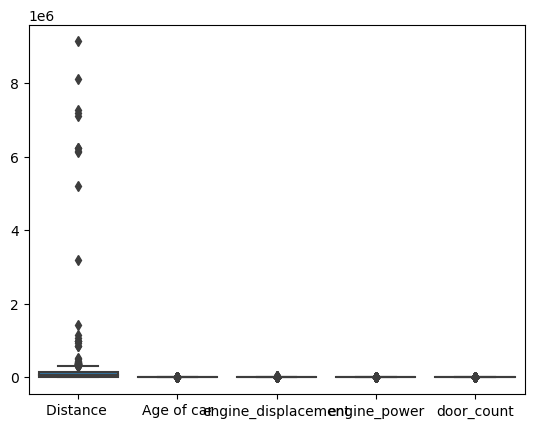

In [326]:
sns.boxplot(data=test2)
plt.show()

In [327]:
# imputing null values
test2['Distance '].fillna(test2['Distance '].median(),inplace=True)
test2['engine_power'].fillna(test2['engine_power'].median(),inplace=True)

# imputing the outlier's

In [328]:
Q1= test2.quantile(0.25)
Q3= test2.quantile(0.75)
IQR= Q3-Q1
IQR

Distance               115675.0
Age of car                  6.0
engine_displacement       594.0
engine_power               47.0
dtype: float64

In [329]:
# 333
testint = test2.select_dtypes(include=['int', 'float'])
testint


for i, j in zip(np.where(testint < Q1 - 1.5 * IQR)[0], np.where(testint < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    testint.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(testint > Q3 + 1.5 * IQR)[0], np.where(testint > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    testint.iloc[i,j] = whisker[j]

In [330]:
testobj = test2.select_dtypes(include=object)


testf3= pd.concat((testobj,testint),axis=1)
testf3

Maker    model    Location      Owner Type transmission door_count  \
0       skoda  octavia      Mumbai           First          man        4.0   
1       skoda    rapid  Coimbatore           Third          man        4.0   
2       skoda  octavia  Coimbatore          Second          man        5.0   
3        audi       q3       Delhi  Fourth & Above         auto        4.0   
4        audi       tt     Chennai           Third         auto        2.0   
...       ...      ...         ...             ...          ...        ...   
5610    skoda  octavia      Mumbai           First          man        4.0   
5611    skoda   superb   Ahmedabad           First          man        4.0   
5612    skoda  octavia   Bangalore          Second          man        5.0   
5613   nissan  qashqai      Jaipur           Third          man        4.0   
5614  hyundai      i30      Jaipur          Second          man        4.0   

     fuel_type  Distance   Age of car  engine_displacement  engine_power  
0       petrol   150000.0          12                 1595          75.0  
1       diesel    29376.0           5                 1598          77.0  
2       diesel    30563.0           5                 1968         110.0  
3       diesel     8650.0           4                 1968         110.0  
4       petrol     6400.0           4                 1984         169.0  
...        ...        ...         ...                  ...           ...  
5610    diesel   149976.0           8                 1968         103.0  
5611    diesel   304512.5          14                 1896          96.0  
5612    diesel   230800.0          14                 1896          77.0  
5613    petrol    63480.0           8                 1997         104.0  
5614    petrol    75000.0           8                 1396          80.0  

[5615 rows x 11 columns]

In [331]:

for i in testf3.select_dtypes(include=['int', 'float']):
    testf3[i] = mms.fit_transform(testf3[[i]])

In [332]:

for i in testf3.select_dtypes('object'):
    testf3[i]= labelencoder.fit_transform(testf3[[i]])
    

In [333]:
testf3.isna().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
door_count             0
fuel_type              0
Distance               0
Age of car             0
engine_displacement    0
engine_power           0
dtype: int64

In [334]:


df_test= pd.get_dummies(testf3, columns=['Maker','model','Owner Type','Location','transmission','door_count','fuel_type'],drop_first=True)
df_test


Distance   Age of car  engine_displacement  engine_power  Maker_1  \
0      0.492591    0.529412             0.461279      0.360111        0   
1      0.096469    0.117647             0.462542      0.371191        0   
2      0.100367    0.117647             0.618266      0.554017        0   
3      0.028406    0.058824             0.618266      0.554017        0   
4      0.021017    0.058824             0.625000      0.880886        0   
...         ...         ...                  ...           ...      ...   
5610   0.492512    0.294118             0.618266      0.515235        0   
5611   1.000000    0.647059             0.587963      0.476454        0   
5612   0.757933    0.647059             0.587963      0.371191        0   
5613   0.208464    0.294118             0.630471      0.520776        0   
5614   0.246295    0.294118             0.377525      0.387812        0   

      Maker_2  Maker_3  Maker_4  Maker_5  Maker_6  ...  Location_7  \
0           0        0        0        0        1  ...           0   
1           0        0        0        0        1  ...           0   
2           0        0        0        0        1  ...           0   
3           0        0        0        0        0  ...           0   
4           0        0        0        0        0  ...           0   
...       ...      ...      ...      ...      ...  ...         ...   
5610        0        0        0        0        1  ...           0   
5611        0        0        0        0        1  ...           0   
5612        0        0        0        0        1  ...           0   
5613        0        0        0        1        0  ...           0   
5614        0        1        0        0        0  ...           0   

      Location_8  Location_9  Location_10  transmission_1  door_count_1  \
0              0           1            0               1             0   
1              0           0            0               1             0   
2              0           0            0               1             0   
3              0           0            0               0             0   
4              0           0            0               0             0   
...          ...         ...          ...             ...           ...   
5610           0           1            0               1             0   
5611           0           0            0               1             0   
5612           0           0            0               1             0   
5613           0           0            0               1             0   
5614           0           0            0               1             0   

      door_count_2  door_count_3  door_count_4  fuel_type_1  
0                1             0             0            1  
1                1             0             0            0  
2                0             1             0            0  
3                1             0             0            0  
4                0             0             0            1  
...            ...           ...           ...          ...  
5610             1             0             0            0  
5611             1             0             0            0  
5612             0             1             0            0  
5613             1             0             0            1  
5614             1             0             0            1  

[5615 rows x 52 columns]

In [335]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             5615 non-null   float64
 1   Age of car           5615 non-null   float64
 2   engine_displacement  5615 non-null   float64
 3   engine_power         5615 non-null   float64
 4   Maker_1              5615 non-null   uint8  
 5   Maker_2              5615 non-null   uint8  
 6   Maker_3              5615 non-null   uint8  
 7   Maker_4              5615 non-null   uint8  
 8   Maker_5              5615 non-null   uint8  
 9   Maker_6              5615 non-null   uint8  
 10  Maker_7              5615 non-null   uint8  
 11  model_1              5615 non-null   uint8  
 12  model_2              5615 non-null   uint8  
 13  model_3              5615 non-null   uint8  
 14  model_4              5615 non-null   uint8  
 15  model_5              5615 non-null   u

In [336]:
pred1 = lr.predict(df_test)
print(test1['Id'],pred1)

0       11001
1       11002
2       11003
3       11004
4       11005
        ...  
5610    16611
5611    16612
5612    16613
5613    16614
5614    16615
Name: Id, Length: 5615, dtype: int64 [ 395594. 1092613. 1556675. ...  234619. 1045066.  644674.]


In [337]:
test1['Id'].reset_index(drop=True,inplace=True)

In [338]:
test1['Id']

0       11001
1       11002
2       11003
3       11004
4       11005
        ...  
5610    16611
5611    16612
5612    16613
5613    16614
5614    16615
Name: Id, Length: 5615, dtype: int64

In [339]:
price=pd.DataFrame({'Price':pred1})

In [343]:
df3=pd.concat([test1,price],axis=1)
df3

Id    Maker    model    Location  Distance       Owner Type  \
0     11001    skoda  octavia      Mumbai   150000.0           First   
1     11002    skoda    rapid  Coimbatore    29376.0           Third   
2     11003    skoda  octavia  Coimbatore    30563.0          Second   
3     11004     audi       q3       Delhi     8650.0  Fourth & Above   
4     11005     audi       tt     Chennai     6400.0           Third   
...     ...      ...      ...         ...        ...             ...   
5610  16611    skoda  octavia      Mumbai   149976.0           First   
5611  16612    skoda   superb   Ahmedabad   332000.0           First   
5612  16613    skoda  octavia   Bangalore   230800.0          Second   
5613  16614   nissan  qashqai      Jaipur    63480.0           Third   
5614  16615  hyundai      i30      Jaipur    75000.0          Second   

      manufacture_year  Age of car  engine_displacement  engine_power  \
0                 2007          12                 1595          75.0   
1                 2014           5                 1598          77.0   
2                 2014           5                 1968         110.0   
3                 2015           4                 1968         110.0   
4                 2015           4                 1984         169.0   
...                ...         ...                  ...           ...   
5610              2011           8                 1968         103.0   
5611              2005          14                 1896          96.0   
5612              2005          14                 1896          77.0   
5613              2011           8                 1997         104.0   
5614              2011           8                 1396          80.0   

      Vroom Audit Rating transmission door_count seat_count fuel_type  \
0                      5          man        4.0        5.0    petrol   
1                      4          man        4.0        5.0    diesel   
2                      5          man        5.0        5.0    diesel   
3                      8         auto        4.0        5.0    diesel   
4                      4         auto        2.0        5.0    petrol   
...                  ...          ...        ...        ...       ...   
5610                   8          man        4.0        5.0    diesel   
5611                   6          man        4.0        5.0    diesel   
5612                   7          man        5.0        5.0    diesel   
5613                   5          man        4.0        7.0    petrol   
5614                   4          man        4.0        5.0    petrol   

          Price  
0      395594.0  
1     1092613.0  
2     1556675.0  
3     2389617.0  
4     2446938.0  
...         ...  
5610   902727.0  
5611   120511.0  
5612   234619.0  
5613  1045066.0  
5614   644674.0  

[5615 rows x 16 columns]